In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import soundfile as sf


from scipy import signal

import librosa as lr
import librosa.feature as feat
import librosa.display


import os 

In [7]:
path_test = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X__test'
path = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X_train'
path_Y = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/Y_train_ofTdMHi.csv'

len(path)

108

Le Format .WAV  qui signifie Waveform Audio File Format, est un format de fichier audio standard pour le stockage de l'audio en format brut, sans compression. Cela signifie qu'il offre une qualité sonore élevée, mais prend plus d'espace de stockage comparé à d'autres formats comme MP3.

# Découverte des données

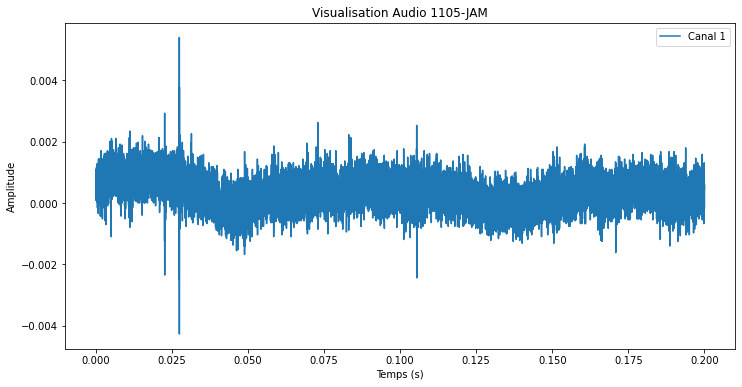

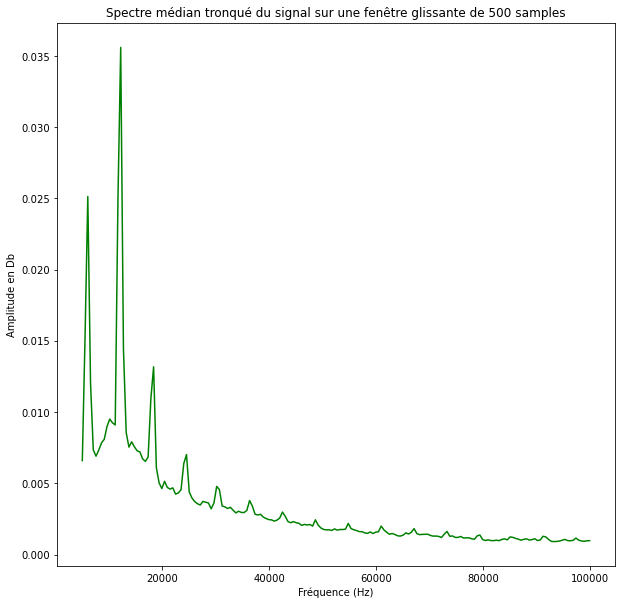

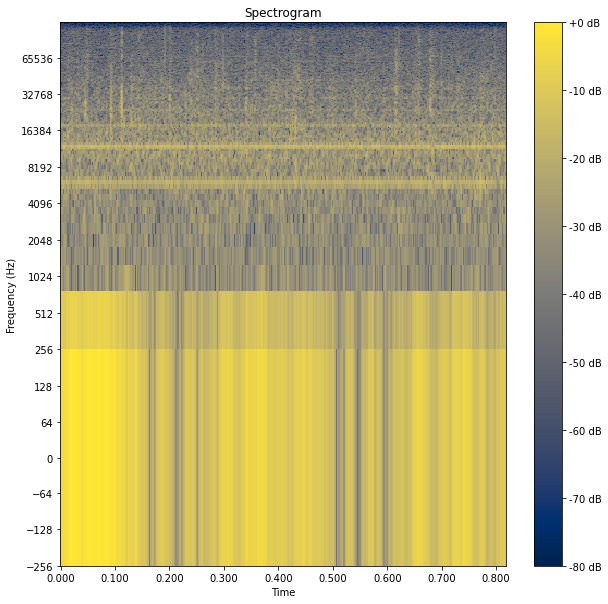

In [35]:
fm = 5e3;fM=1e5;n_fft=500


def visual_audio(path,display=True,fm = 1e3,fM=1e5,n_fft=1000):
    # Ouvrir le fichier WAV en mode lecture
    if path.endswith(".wav"):
        # Obtenir des informations de base le vecteur audio et la fréquence d'échantillonnage
        audio, sr = sf.read(path) #audio est un array et sr est la freq d'echantillonnage
        n_frames = audio.shape[0] # donne le nb d'echantillon
        duration = n_frames/sr# en sec
        
        #n_fft=1000 #permet d'avoir plus de features si on l'augmente, ici on en a 438
        # Pour calculer le STFT qui est TF discrète sur une fenêtre glissante 
        tf_sig = lr.stft(audio, n_fft=n_fft)
        tf_sig = np.abs(tf_sig)

        sos = signal.butter(6, [5000, 100000], 'bandpass', fs=sr, output='sos') # création  d'un filtre passe-bande les fréquences entre 1kHz et 100kHz
        sig = signal.sosfiltfilt(sos, audio) # Applique ce filtre à l'audio de manière bidirectionnelle pour réduire le décalage de phase.

        #Caractéristiques du signal
        rms = feat.rms(y=sig) #Calcule la RMS su signal qui est une mesure de l'amplitude du signal audio.
        sc = feat.spectral_centroid(y=sig, sr=sr) #centroïde spectral, une mesure qui indique où se situe le "centre de masse" du spectre.
        sb = feat.spectral_bandwidth(y=sig,sr=sr) #Calcule la largeur de bande spectrale, qui mesure la largeur du spectre.
        sfs = feat.spectral_flatness(y=sig) #Calcule la platitude spectrale, qui est une mesure de la « planéité » du spectre.

        features = [np.mean(rms), np.std(rms), np.min(rms), np.max(rms),\
                    np.mean(sc), np.std(sc), np.min(sc), np.max(sc),\
                    np.mean(sb), np.std(sb), np.min(sb), np.max(sb),\
                    np.mean(sfs), np.std(sfs), np.min(sfs), np.max(sfs)]

        # Calcul des fréquences pour chaque point de la FFT
        frequences = lr.fft_frequencies(sr=sr, n_fft=n_fft)

        # Calcul de la médiane sur l'axe temporel associé à chaque fenêtre + tronquage de 3khz à un peu moins que la fenêtre de Shannon
        median = np.median(tf_sig, axis=1)[(fm<frequences) & (frequences<fM)]
        frequences = frequences[(fm<frequences) & (frequences<fM)]

        loc = path[115:-4] #Pour récupérer la location de l'audio 

        
        if display:
            # Affichage du signal
            # Créer le temps (axe x)
            time = np.linspace(1/sr,duration,n_frames)
            plt.figure(figsize=(12, 6))
            plt.plot(time,audio, label="Canal 1")
            plt.title(f"Visualisation Audio {path[110:-4]}")
            plt.xlabel("Temps (s)")
            plt.ylabel("Amplitude")
            plt.legend()
            plt.show()

            # Tracer le spectre avec les fréquences en abscisses
            plt.figure(figsize=(10,10))
            plt.plot(frequences, median,c='g')
            plt.xlabel('Fréquence (Hz)')
            plt.ylabel('Amplitude en Db')
            plt.title(f'Spectre médian tronqué du signal sur une fenêtre glissante de {n_fft} samples')
            plt.show()
            
            #Affichage du spectre fréquenciel du signal
            plt.figure(figsize=(10, 10))
            lr.display.specshow(lr.amplitude_to_db(tf_sig, ref=np.max),
                                sr=sr, 
                                y_axis='log', 
                                x_axis='time', 
                                cmap='cividis')  # Changez 'cividis' par votre couleur préférée
            plt.title("Spectrogram")
            plt.xlabel("Time")
            plt.ylabel("Frequency (Hz)")
            plt.colorbar(format='%+2.0f dB')
            plt.show()

        return sr, duration, median, loc, features
    else:
        print("Le fichier suivant n'est pas au format .wav",path)

def recup_freq(path,fm = 1e3,fM=1e5,n_fft=1000):
    audio, sr = sf.read(path) #audio est un array et sr est la freq d'echantillonnage
    
    #n_fft=1000 #permet d'avoir plus de features si on l'augmente, ici on en a 438
    # Pour calculer le STFT qui est TF discrète sur une fenêtre glissante 
    tf_sig = lr.stft(audio, n_fft=n_fft)
    tf_sig = np.abs(tf_sig)

    # Calcul des fréquences pour chaque point de la FFT
    frequences = lr.fft_frequencies(sr=sr, n_fft=n_fft)

    # Calcul de la médiane sur l'axe temporel associé à chaque fenêtre + tronquage de 3khz à un peu moins que la fenêtre de Shannon
    median = np.median(tf_sig, axis=1)[(fm<frequences) & (frequences<fM)]
    frequences = frequences[(fm<frequences) & (frequences<fM)]

    return frequences

sr, duration, median, loc, features = visual_audio(os.path.join(path,'01105-JAM.wav'),display=True,fm = fm,fM=fM,n_fft=n_fft)

frequences = recup_freq(os.path.join(path,'01105-JAM.wav'),fm = fm,fM=fM,n_fft=n_fft)

In [ ]:
list1 = ["01670-JAM.wav","01671-JAM.wav","01672-JAM.wav","01673-JAM.wav","01674-JAM.wav","01675-JAM.wav","01676-JAM.wav","01677-JAM.wav","01678-JAM.wav","01679-JAM.wav","01680-JAM.wav","01681-JAM.wav","01682-JAM.wav","01683-JAM.wav","01684-JAM.wav"]
list2 = ["00411-BON.wav",\
"00412-BON.wav",\
"00413-BON.wav",\
"00414-BON.wav",\
"00415-BON.wav",\
"00416-BON.wav",\
"00417-BON.wav"]

for audio in list2:
    visual_audio(os.path.join(path,audio))

## tester l'homogénéité des données et récupérer des features intéressantes 

In [36]:
dico1 = {}
for ech in os.listdir(path):
    dico1[f"{ech}"] = visual_audio(os.path.join(path,ech),display=False,fm = fm,fM=fM,n_fft=n_fft)
    if dico1[f"{ech}"] == None:
        dico1.pop(f"{ech}")


Le fichier suivant n'est pas au format .wav /home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X_train/.DS_Store


In [37]:
dicotest = {}
for ech in os.listdir(path_test):
    dicotest[f"{ech}"] = visual_audio(os.path.join(path_test,ech),display=False,fm = fm,fM=fM,n_fft=n_fft)
    if dicotest[f"{ech}"] == None:
        dicotest.pop(f"{ech}")

Le fichier suivant n'est pas au format .wav /home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X__test/.DS_Store
Le fichier suivant n'est pas au format .wav /home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X__test/.zip


In [161]:
for key in dico1.keys():
    c=0
    if (dico1[str(key)][0]!=256000) | (dico1[str(key)][1]!=0.2):
        print(key)
        c+=1
print(f"Il y a {c} fichiers non conformes dans le fichier train ")

for key in dicotest.keys():
    c=0
    if (dicotest[str(key)][0]!=256000) | (dicotest[str(key)][1]!=0.2):
        print(key)
        c+=1
print(f"Il y a {c} fichiers non conformes dans le fichier test")

Il y a 0 fichiers non conformes dans le fichier train 
Il y a 0 fichiers non conformes dans le fichier test


## Ajout de la variable target et création d'un data frame, export un csv


In [38]:
Y_train = pd.read_csv(path_Y)
f = lambda x:x[6:-4]
Y_train['loc'] = Y_train['id'].apply(f)
Y_train

,id,pos_label,loc
0,00000-JAM.wav,0.0,JAM
1,00001-JAM.wav,1.0,JAM
2,00002-JAM.wav,1.0,JAM
3,00003-JAM.wav,1.0,JAM
4,00004-JAM.wav,1.0,JAM
...,...,...,...
23163,23163-StMARTIN.wav,0.0,StMARTIN
23164,23164-StMARTIN.wav,0.0,StMARTIN
23165,23165-StMARTIN.wav,0.0,StMARTIN
23166,23166-StMARTIN.wav,0.0,StMARTIN


In [39]:
columns_names = ["target"] + list(frequences) + ["rms.mean","rms.std","rms.min","rms.max","sc.mean","sc.std","sc.min","sc.max","sb.mean","sb.std","sb.min","sb.max","sfs.mean","sfs.std","sfs.min","sfs.max"]

data = []
for i in Y_train.index:
    data_i = [ Y_train.iloc[i]["pos_label"]]
    data_i = data_i + list(dico1[Y_train.iloc[i]["id"]][2]) + dico1[Y_train.iloc[i]["id"]][4]
    data.append(data_i)
    

In [40]:
columns_test_names = ["id"] +list(frequences) + ["rms.mean","rms.std","rms.min","rms.max","sc.mean","sc.std","sc.min","sc.max","sb.mean","sb.std","sb.min","sb.max","sfs.mean","sfs.std","sfs.min","sfs.max"]

data_test = []

for key in dicotest.keys():
    data_i = [key]
    data_i = data_i + list(dicotest[key][2]) + dicotest[key][4]
    data_test.append(data_i)


In [41]:
df = pd.DataFrame(data,columns=columns_names)

In [42]:
df_test = pd.DataFrame(data_test,columns=columns_test_names)

In [43]:
df.to_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/features_data.csv")
df_test.to_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/test_features_data.csv")


# Preprocessing du DataFrame

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [104]:
df = pd.read_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/features_data.csv",index_col=0)
df.index = range(1,23169)
df.head()

,target,5120.0,5632.0,6144.0,6656.0,7168.0,7680.0,8192.0,8704.0,9216.0,...,sc.min,sc.max,sb.mean,sb.std,sb.min,sb.max,sfs.mean,sfs.std,sfs.min,sfs.max
1,0.0,0.006959,0.006506,0.007192,0.007714,0.007553,0.007517,0.008589,0.008999,0.009459,...,29273.938993,36801.024729,24774.591555,795.562058,21782.369512,26305.819243,0.019416,0.006762,0.009422,0.073818
2,1.0,0.006460,0.007672,0.007656,0.006923,0.007319,0.007822,0.008587,0.008859,0.009944,...,28935.108670,45693.603144,25242.833502,1002.853259,23035.653604,27829.674762,0.021222,0.007939,0.010541,0.072316
3,1.0,0.006974,0.007165,0.007305,0.007045,0.007103,0.007947,0.008297,0.008479,0.009564,...,30212.095058,45775.249244,25244.598160,853.897949,23186.677123,27835.712913,0.021065,0.006066,0.011405,0.062272
4,1.0,0.006417,0.006704,0.006940,0.006964,0.007266,0.008100,0.008165,0.008585,0.009721,...,29700.957887,45682.357907,25053.251604,730.607384,23142.031762,27296.109279,0.021077,0.009550,0.011300,0.075097
5,1.0,0.006822,0.006752,0.006998,0.007682,0.008148,0.008192,0.008544,0.008477,0.009467,...,28609.695118,45784.247882,24855.740606,638.327786,22298.196021,26234.226162,0.019088,0.003976,0.008999,0.036834


In [105]:
df_test = pd.read_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/test_features_data.csv",index_col='id')
df_test = df_test.iloc[:,1:]
df_test.head()



,5120.0,5632.0,6144.0,6656.0,7168.0,7680.0,8192.0,8704.0,9216.0,9728.0,...,sc.min,sc.max,sb.mean,sb.std,sb.min,sb.max,sfs.mean,sfs.std,sfs.min,sfs.max
id,,,,,,,,,,,,,,,,,,,,,
23331-TEST.wav,0.006488,0.006507,0.006509,0.006589,0.006255,0.006139,0.006455,0.006474,0.006727,0.006731,...,42221.978198,53582.031222,28487.521829,834.395091,25559.525119,32874.922161,0.043576,0.033803,0.025661,0.259514
24024-TEST.wav,0.017084,0.015606,0.014809,0.015156,0.016088,0.014098,0.015004,0.013929,0.014911,0.014530,...,19650.042769,65007.620132,26700.847992,3003.412692,20730.347263,36387.039014,0.012914,0.010853,0.001539,0.084409
23561-TEST.wav,0.008151,0.008715,0.008039,0.008149,0.008367,0.008905,0.009219,0.009952,0.010113,0.011066,...,25193.976217,42383.968012,24538.367699,1027.923442,22126.285587,26927.954881,0.010701,0.004683,0.005596,0.029844
24116-TEST.wav,0.007237,0.008096,0.007388,0.007807,0.007976,0.008639,0.009221,0.009635,0.010350,0.011888,...,26350.341905,56332.891365,25389.779937,1186.004568,23654.506025,28898.730715,0.012301,0.007692,0.005221,0.042407
24001-TEST.wav,0.007638,0.008356,0.008317,0.008692,0.009303,0.009056,0.009634,0.011001,0.011166,0.013493,...,24001.284887,41441.295101,24362.457972,1048.053794,20412.532042,28621.602328,0.008915,0.005822,0.003488,0.043886


# Machine learning

In [47]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,f1_score # pour voir l'efficacité globale du modèle
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import seaborn as sns

In [49]:
trainset, testset = train_test_split(df, test_size=0.2,random_state=0)
trainset.head()


,target,5120.0,5632.0,6144.0,6656.0,7168.0,7680.0,8192.0,8704.0,9216.0,...,sc.min,sc.max,sb.mean,sb.std,sb.min,sb.max,sfs.mean,sfs.std,sfs.min,sfs.max
14714,1.0,0.013100,0.013723,0.013370,0.013150,0.013467,0.013408,0.013180,0.013912,0.015205,...,28524.365983,51187.045893,25199.469295,1079.147152,21033.229460,27378.195866,0.018816,0.007139,0.007274,0.050142
22766,0.0,0.009182,0.009864,0.009955,0.009948,0.009888,0.011505,0.011751,0.014130,0.015897,...,30493.609363,41291.039373,25331.679407,1070.464343,22126.704462,28030.964438,0.016098,0.008716,0.009029,0.071206
15055,1.0,0.013286,0.013933,0.014153,0.014464,0.014140,0.014498,0.015036,0.015850,0.016932,...,27273.041824,54296.429520,24674.263337,1053.633268,21669.234337,28138.714813,0.016681,0.004258,0.005701,0.033173
12613,1.0,0.006698,0.006900,0.006742,0.007166,0.007532,0.006905,0.007228,0.007519,0.008492,...,30141.335772,48539.812509,25057.811218,927.074287,20898.698329,26506.854814,0.021302,0.008969,0.012803,0.089291
6286,0.0,0.007528,0.007260,0.007250,0.007669,0.007958,0.008034,0.008291,0.008365,0.009343,...,29537.667415,41281.654905,25065.171125,989.361112,22169.007421,28012.728347,0.015157,0.006142,0.007060,0.057325


### Équilibre des classes 

In [50]:
print(trainset.target.value_counts()/trainset.target.shape[0])
print(testset.target.value_counts()/testset.target.shape[0])

target
0.0    0.589673
1.0    0.410327
Name: count, dtype: float64
target
0.0    0.601856
1.0    0.398144
Name: count, dtype: float64


In [51]:
def preprocessing(dataframe):
    return dataframe.drop('target',axis=1), dataframe.target

X_train,Y_train = preprocessing(trainset)
X_test,Y_test = preprocessing(testset)

In [70]:
    
def evaluation_model(model,X_train,X_test,Y_train,Y_test,lc=True):
    
    model.fit(X_train,Y_train)
    
    Y_pred = model.predict(X_test)
    # Prédire les probabilités pour la classe positive
    Y_proba_pred = model.predict_proba(X_test)
    # Calculer les scores TPR (True Positive Rate) et FPR (False Positive Rate)
    fpr, tpr, thresholds = roc_curve(Y_test, Y_proba_pred[:,1])
          
        
    matrix_conf = confusion_matrix(Y_test,Y_pred)
    print(classification_report(Y_test,Y_pred))
    
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix_conf,annot=True,fmt='g')
    plt.title('Matrice de confusion')
    plt.xlabel('Prédictions')
    plt.ylabel('Valeurs réelles')
    plt.show()

    if lc:
        N,train_score,val_score = learning_curve(model,X_train,Y_train,cv=4,train_sizes=np.linspace(0.1,1,10),scoring="f1") 
        #calcule les différents score avec de la cross validation pour des entrainements de plus en plus grand en données 
        # Ici le Val score est un morceau des données train

        plt.figure(figsize=(8,8))
        plt.plot(N,train_score.mean(axis=1),label="train score")
        plt.plot(N,val_score.mean(axis=1),label="train score")
        plt.legend()
        plt.show()

    # Calculer l'aire sous la courbe ROC (AUC)
    roc_auc = auc(fpr, tpr)

    # Tracer la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.6f})') # aire sous la courbe
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC (Receiver Operating Characteristic)')
    plt.legend(loc="lower right")
    plt.show()

## Premier modèle naïf

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      2789
         1.0       0.92      0.92      0.92      1845

    accuracy                           0.94      4634
   macro avg       0.93      0.93      0.93      4634
weighted avg       0.94      0.94      0.94      4634



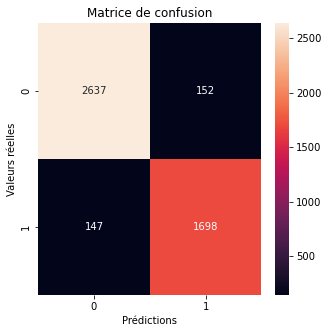

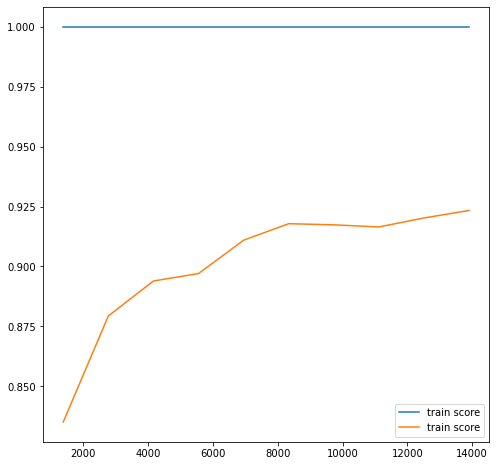

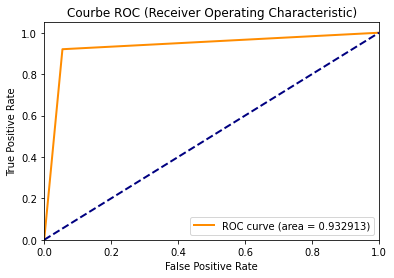

In [71]:
tree1 = DecisionTreeClassifier(random_state=0)

evaluation_model(tree1,X_train,X_test,Y_train,Y_test)


On voit que notre modèle est en overfitting car il est parfait sur les données train mais pas sur les données testé avec la cross validation. On remarque cependant que donner plus de données à notre modèle le fait progresser.  

<AxesSubplot:title={'center':'Importance des variables pour ce modèle'}>

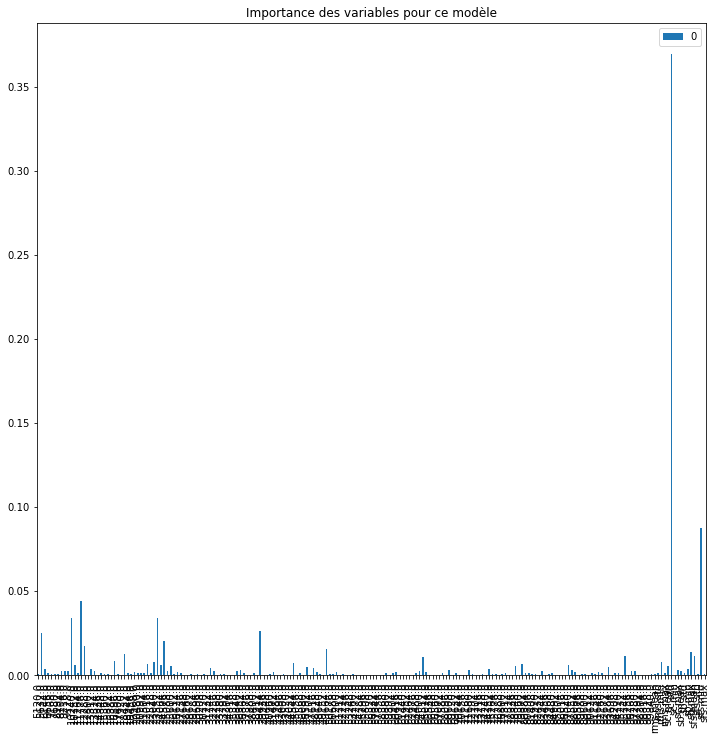

In [54]:
pd.DataFrame(tree1.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,12),title='Importance des variables pour ce modèle')

## Une Random forest 

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      2789
         1.0       0.96      0.96      0.96      1845

    accuracy                           0.97      4634
   macro avg       0.97      0.97      0.97      4634
weighted avg       0.97      0.97      0.97      4634



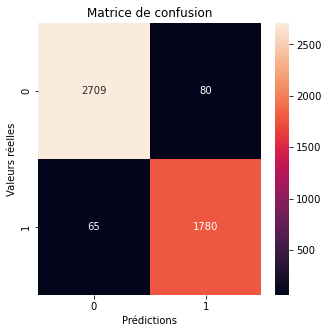

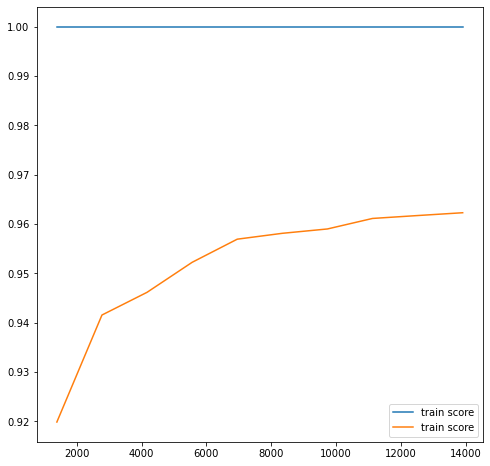

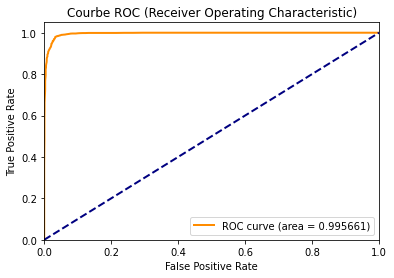

In [55]:
# Créer le modèle DecisionTreeClassifier
forest_tree = RandomForestClassifier(random_state=0)

# Entraîner le modèle
evaluation_model(forest_tree ,X_train,X_test,Y_train,Y_test)



<AxesSubplot:title={'center':'Importance des variables pour ce modèle'}>

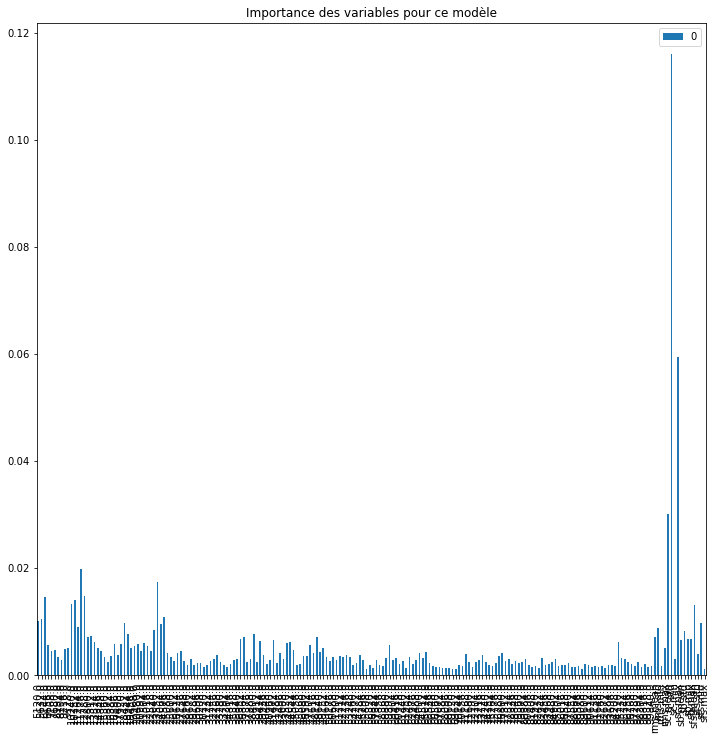

In [56]:
pd.DataFrame(forest_tree.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,12),title='Importance des variables pour ce modèle')

### Soumission1 modèle random forest

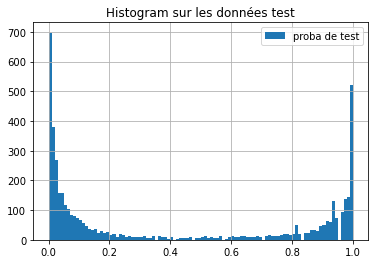

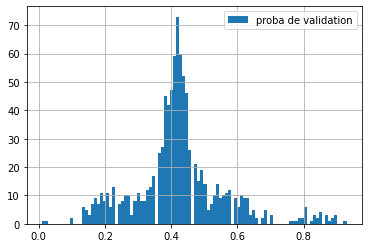

In [57]:

plt.hist(forest_tree.predict_proba(X_test)[:,1],100,density=False,label='proba de test')
plt.grid()
plt.legend()
plt.title("Histogram sur les données test")
plt.show()


plt.hist(forest_tree.predict_proba(df_test)[:,1],100,density=False,label='proba de validation')
plt.grid()
plt.legend()
plt.show()




In [58]:
df_soumission1 = df_test.drop(df_test.columns,axis = 1)
df_soumission1['pos_label'] = forest_tree.predict_proba(df_test)[:,1]
df_soumission1.to_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/soumission1.csv")

## Make a Pipeline avec de la random Forest et des features polynomiales

In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif #Choisir les meilleurs varialbles avec un test d'Anova
from sklearn.preprocessing import PolynomialFeatures


              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      2789
         1.0       0.95      0.94      0.95      1845

    accuracy                           0.96      4634
   macro avg       0.96      0.95      0.96      4634
weighted avg       0.96      0.96      0.96      4634



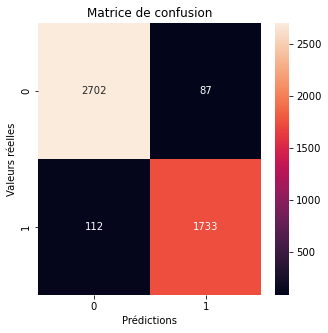

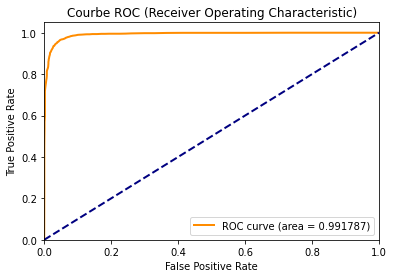

In [60]:
model = make_pipeline(SelectKBest(f_classif,k=25),                      
                      RandomForestClassifier(random_state=0))

# Entraîner le modèle
evaluation_model(model ,X_train,X_test,Y_train,Y_test,lc=False)

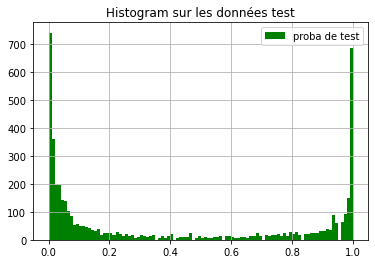

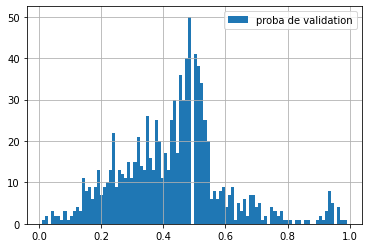

In [61]:

plt.hist(model.predict_proba(X_test)[:,1],100,color='g',density=False,label='proba de test')
plt.grid()
plt.legend()
plt.title("Histogram sur les données test")
plt.show()


plt.hist(model.predict_proba(df_test)[:,1],100,density=False,label='proba de validation')
plt.grid()
plt.legend()
plt.show()



### Soumission2 make a pipeline, ACP et Random forest

In [29]:
df_soumission2 = df_test.drop(df_test.columns,axis = 1)
df_soumission2['pos_label'] = model.predict_proba(df_test)[:,1]
df_soumission2.to_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/soumission2.csv")

# Deep learning

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [86]:
    
def evaluation_model(model,X_train,X_test,Y_train,Y_test, batch_size=20, epochs=80,lr=0.001):
    
    #Pour stopper quand les courbe de cout se croise
    earlystopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

    adam_optimizer = Adam(learning_rate=lr)
    # Compilateur du modèle avec le nouvel optimiseur
    model.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])
    
    #garder en mémoire
    history =  model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test,Y_test),callbacks=[earlystopping] )

    # Prédire les probabilités pour la classe positive
    Y_proba_pred = model.predict(X_test)
    Y_pred = Y_proba_pred > 0.5
    
        
    matrix_conf = confusion_matrix(Y_test,Y_pred)
    print(classification_report(Y_test,Y_pred))

    ##Matrice de confusion 
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix_conf,annot=True,fmt='g')
    plt.title('Matrice de confusion')
    plt.xlabel('Prédictions')
    plt.ylabel('Valeurs réelles')
    plt.show()

    ##Historique de l'apprentissage
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Accuracy (training data)')
    plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
    plt.title('Accuracy over epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='loss (training data)')
    plt.plot(history.history['val_loss'], label='loss(validation data)')
    plt.title('Loss over epochs')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # Calculer les scores TPR (True Positive Rate) et FPR (False Positive Rate)
    fpr, tpr, thresholds = roc_curve(Y_test, Y_proba_pred)

    # Calculer l'aire sous la courbe ROC (AUC)
    roc_auc = auc(fpr, tpr)

    # Tracer la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.6f})') # aire sous la courbe
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC (Receiver Operating Characteristic)')
    plt.legend(loc="lower right")
    plt.show()
    


## Un réseau de neurones multicouches

### Standardisation des données

In [108]:
df = pd.read_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/features_data.csv",index_col=0)
df.index = range(1,23169)
df_std = df.copy()

df_test = pd.read_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/test_features_data.csv",index_col='id')
df_test = df_test.iloc[:,1:]
df_test_std = df_test.copy()


df_std.iloc[:,1:] = (df_std.iloc[:,1:] - df_std.iloc[:,1:].mean(axis=0))/df_std.iloc[:,1:].std(axis=0)
df_test_std = (df_test_std - df_test_std.mean(axis=0) )/ df_test_std.std(axis=0)

trainset, testset = train_test_split(df_std, test_size=0.2,random_state=0)

def preprocessing(dataframe):
    return dataframe.drop('target',axis=1), dataframe.target

X_train,Y_train = preprocessing(trainset)
X_test,Y_test = preprocessing(testset)

Epoch 1/115
93/93 [==============================] - 2s 12ms/step - loss: 0.6591 - accuracy: 0.6565 - val_loss: 0.5913 - val_accuracy: 0.7654
Epoch 2/115
93/93 [==============================] - 1s 9ms/step - loss: 0.5401 - accuracy: 0.7475 - val_loss: 0.4505 - val_accuracy: 0.8047
Epoch 3/115
93/93 [==============================] - 1s 9ms/step - loss: 0.4545 - accuracy: 0.7976 - val_loss: 0.3873 - val_accuracy: 0.8407
Epoch 4/115
93/93 [==============================] - 1s 10ms/step - loss: 0.4120 - accuracy: 0.8209 - val_loss: 0.3483 - val_accuracy: 0.8623
Epoch 5/115
93/93 [==============================] - 1s 9ms/step - loss: 0.3835 - accuracy: 0.8406 - val_loss: 0.3231 - val_accuracy: 0.8811
Epoch 6/115
93/93 [==============================] - 1s 10ms/step - loss: 0.3594 - accuracy: 0.8523 - val_loss: 0.3035 - val_accuracy: 0.8876
Epoch 7/115
93/93 [==============================] - 1s 10ms/step - loss: 0.3388 - accuracy: 0.8598 - val_loss: 0.2926 - val_accuracy: 0.8932
Epoch 8/1

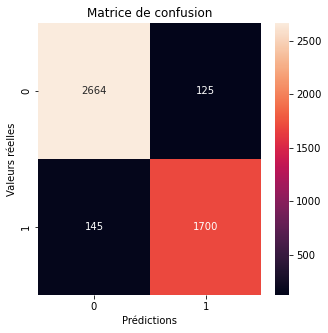

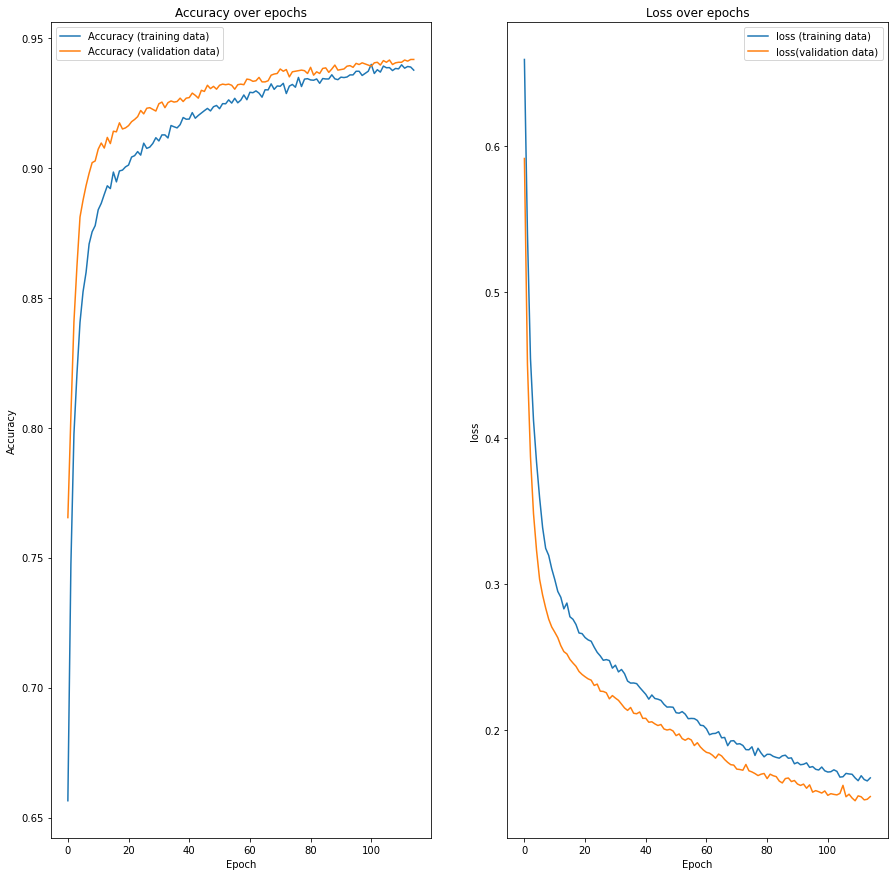

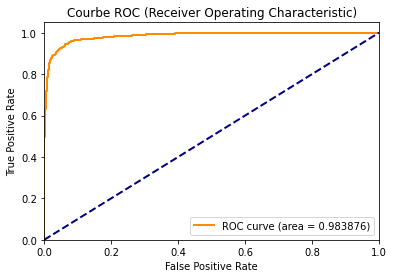

In [123]:

neuronal_network = Sequential()
neuronal_network.add(Dense(21,input_dim=X_train.shape[1], activation='swish'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.25))

neuronal_network.add(Dense(63, activation='swish'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.25))

neuronal_network.add(Dense(189, activation='swish'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.25))

neuronal_network.add(Dense(567, activation='swish'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.5))

neuronal_network.add(Dense(189, activation='swish'))  # input_shape doit correspondre à la forme de vos données d'entrée
neuronal_network.add(Dropout(0.25))

neuronal_network.add(Dense(1, activation='sigmoid'))  # Sortie binaire

evaluation_model(neuronal_network,X_train,X_test,Y_train,Y_test, batch_size=200, epochs=140,lr=0.0001)

  1/145 [..............................] - ETA: 2s

145/145 [==============================] - 0s 2ms/step


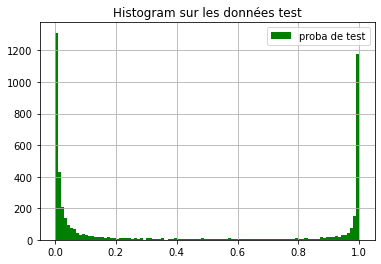

30/30 [==============================] - 0s 2ms/step


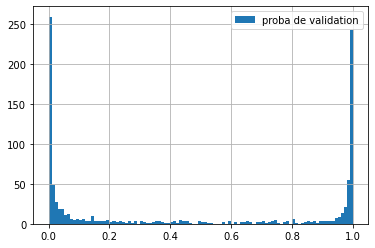

In [130]:
plt.hist(neuronal_network.predict(X_test),100,color='g',density=False,label='proba de test')
plt.grid()
plt.legend()
plt.title("Histogram sur les données test")
plt.show()


plt.hist(neuronal_network.predict(df_test_std),100,density=False,label='proba de validation')
plt.grid()
plt.legend()
plt.show()

In [154]:
df_soumission3 = df_test.drop(df_test.columns,axis = 1)
df_soumission3['pos_label'] = neuronal_network.predict(df_test_std)
df_soumission3.to_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/soumission3_neuronal1.csv")

 1/30 [>.............................] - ETA: 0s

30/30 [==============================] - 0s 2ms/step
